Dataset de Producciones de Teatro Musical en España (2011–2025) (Maestro)

Este dataset es propio y ha sido diseñado y construido manualmente a partir del conocimiento del sector del teatro musical en España, combinando información procedente de fuentes públicas y oficiales, como páginas web de productoras y teatros, carteleras históricas, notas de prensa y comunicación institucional.

El objetivo del dataset es modelizar una muestra representativa de las producciones de teatro musical estrenadas en España entre 2011 y 2025, con un enfoque analítico orientado a identificar patrones de producción, dinámicas por productora, evolución temporal de los estrenos, duración de las producciones y presencia de giras.

Este dataset no pretende ser un censo exhaustivo del sector, sino una muestra curada, coherente y analíticamente consistente, estructurada para facilitar análisis exploratorios (EDA), visualizaciones y la construcción de dashboards descriptivos. Incluye variables clave como obra, productora, teatro de estreno, año de inicio y fin, duración y realización de gira.

In [7]:
import pandas as pd          # Manejo y análisis de datos en tablas (DataFrames)
from IPython.display import display  # Muestra objetos de forma clara en notebooks
import matplotlib.pyplot as plt      # Crear gráficos y visualizaciones
import seaborn as sns        # Gráficos estadísticos atractivos (basado en matplotlib)
from matplotlib.lines import Line2D  # Crear o personalizar líneas en gráficos


SHAPE: (75, 8)


,obra,productora,anio_inicio,anio_fin,teatro,gira,activa,duracion
0,"101 Dálmatas, el musical",Teatropolis (Gran Teatro CaixaBank Príncipe Pío),2023,NaN,Gran Teatro CaixaBank Príncipe Pío,No,Sí,90.0
1,Aladdín,Stage Entertainment,2023,2025.0,Teatro Coliseum,No,No,145.0
2,Anastasia,Stage Entertainment,2018,2020.0,Teatro Coliseum,No,No,95.0
3,Annie,Theatre Properties,2010,2011.0,Nuevo Alcalá,No,No,120.0
4,Avenue Q,SMedia,2010,2011.0,Nuevo Apolo,No,No,135.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obra         75 non-null     object 
 1   productora   75 non-null     object 
 2   anio_inicio  75 non-null     int64  
 3   anio_fin     62 non-null     float64
 4   teatro       75 non-null     object 
 5   gira         75 non-null     object 
 6   activa       75 non-null     object 
 7   duracion     75 non-null     float64
dtypes: float64(2), int64(1), object(5)
memory usage: 4.8+ KB


None

obra            0
productora      0
anio_inicio     0
anio_fin       13
teatro          0
gira            0
activa          0
duracion        0
dtype: int64

,coverage_%
obra,100.0
productora,100.0
anio_inicio,100.0
anio_fin,82.7
teatro,100.0
gira,100.0
activa,100.0
duracion,100.0


Filas dentro de grupos duplicados: 0
Grupos duplicados reales: 0
OK: no hay duplicados según la clave definida.


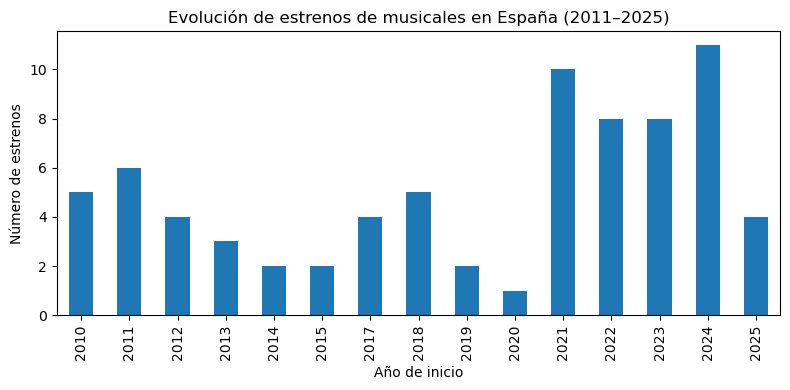

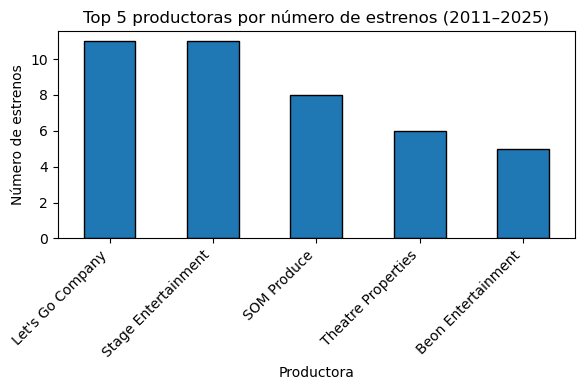

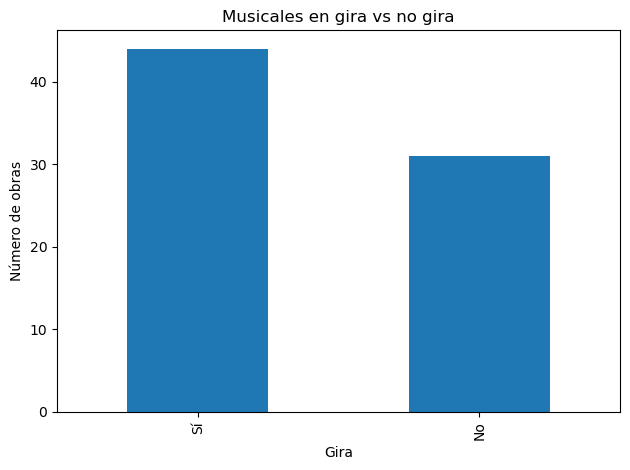

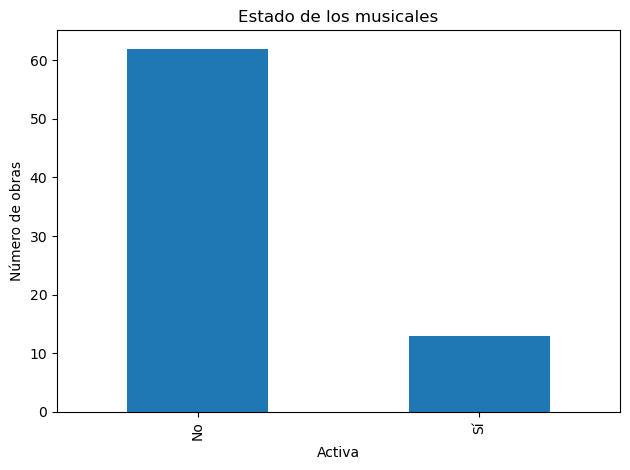

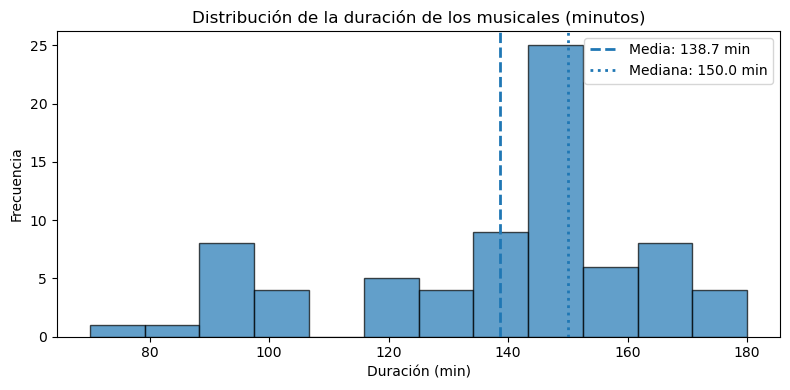

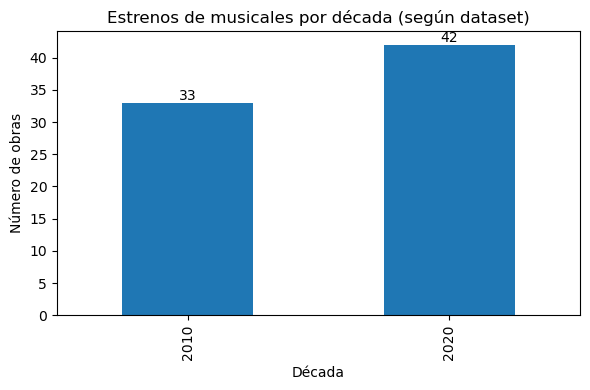

TOTAL DE MUSICALES: 75
DURACIÓN MEDIA (min): 138.7
PORCENTAJE EN GIRA (%): 58.7
PORCENTAJE ACTIVOS (%): 17.3


In [8]:
# =====================================================
# EDA FINAL — DATASET MAESTRO MUSICALES 
# DF: df_maestro
# =====================================================
df_maestro = pd.read_csv(
    "../Data/maestro_musicales.csv",
    encoding="utf-8"
)
# ---------------------
# 1. FOTO EJECUTIVA
# ---------------------
print("SHAPE:", df_maestro.shape)
display(df_maestro.head())
display(df_maestro.info())
display(df_maestro.isna().sum())

# Asegurar tipos
df_maestro["anio_inicio"] = pd.to_numeric(df_maestro["anio_inicio"], errors="coerce")
df_maestro["anio_fin"] = pd.to_numeric(df_maestro["anio_fin"], errors="coerce")
df_maestro["duracion"] = pd.to_numeric(df_maestro["duracion"], errors="coerce")

# ---------------------
# 2. CALIDAD DE DATOS
# ---------------------
coverage = (df_maestro.notna().mean() * 100).round(1)
display(pd.DataFrame({"coverage_%": coverage}))

# ---------------------
# 3. CONTROL DE DUPLICADOS (CLAVE DE NEGOCIO)
# ---------------------
for c in ["obra", "productora", "teatro"]:
    df_maestro[c] = df_maestro[c].astype(str).str.strip()

clave = ["obra", "productora", "anio_inicio", "teatro"]

filas_dupe = df_maestro[df_maestro.duplicated(subset=clave, keep=False)]
print("Filas dentro de grupos duplicados:", filas_dupe.shape[0])

grupos_dupe = (
    df_maestro
    .groupby(clave, dropna=False)
    .size()
    .reset_index(name="n")
    .query("n > 1")
    .sort_values("n", ascending=False)
)

print("Grupos duplicados reales:", grupos_dupe.shape[0])

if grupos_dupe.shape[0] > 0:
    display(grupos_dupe.head(20))
    display(filas_dupe.sort_values(clave).head(50))
else:
    print("OK: no hay duplicados según la clave definida.")

# ---------------------
# 4. ANÁLISIS DESCRIPTIVO
# ---------------------
# 4.1 Obras por año de inicio
estrenos_anio = df_maestro["anio_inicio"].value_counts().sort_index()

plt.figure(figsize=(8,4))
estrenos_anio.plot(kind="bar")
plt.plot(estrenos_anio.index, estrenos_anio.values, marker="o")
plt.title("Evolución de estrenos de musicales en España (2011–2025)")
plt.xlabel("Año de inicio")
plt.ylabel("Número de estrenos")
plt.tight_layout()
plt.show()

# Top 5 productoras
4.2
top5 = (
    df_maestro
    .groupby("productora")["obra"]
    .count()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(6,4))
top5.plot(kind="bar", edgecolor="black")
plt.title("Top 5 productoras por número de estrenos (2011–2025)")
plt.xlabel("Productora")
plt.ylabel("Número de estrenos")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 4.3 Gira vs No gira
df_maestro["gira"].value_counts().plot(kind="bar", title="Musicales en gira vs no gira")
plt.xlabel("Gira")
plt.ylabel("Número de obras")
plt.tight_layout()
plt.show()

# 4.4 Activa vs no activa
df_maestro["activa"].value_counts().plot(kind="bar", title="Estado de los musicales")
plt.xlabel("Activa")
plt.ylabel("Número de obras")
plt.tight_layout()
plt.show()

# ---------------------
# 5. DURACIÓN (VARIABLE CLAVE)
# ---------------------
# Serie limpia
dur = df_maestro["duracion"].dropna()

# Métricas clave
media = dur.mean()
mediana = dur.median()

plt.figure(figsize=(8,4))

# Histograma (menos bins, más legible)
plt.hist(dur, bins=12, edgecolor="black", alpha=0.7)

# Líneas de referencia
plt.axvline(media, linestyle="--", linewidth=2, label=f"Media: {media:.1f} min")
plt.axvline(mediana, linestyle=":", linewidth=2, label=f"Mediana: {mediana:.1f} min")

# Etiquetas
plt.title("Distribución de la duración de los musicales (minutos)")
plt.xlabel("Duración (min)")
plt.ylabel("Frecuencia")
plt.legend()

plt.tight_layout()
plt.show()

# ---------------------
# 6. EVOLUCIÓN TEMPORAL
# ---------------------
import pandas as pd
import matplotlib.pyplot as plt

# asegurar numérico
df_maestro["anio_inicio"] = pd.to_numeric(df_maestro["anio_inicio"], errors="coerce")

# década calculada al vuelo (NO se guarda en el DF)
decadas = (df_maestro["anio_inicio"].dropna() // 10 * 10).astype(int)

conteo = decadas.value_counts().sort_index()

ax = conteo.plot(kind="bar", figsize=(6,4))
plt.title("Estrenos de musicales por década (según dataset)")
plt.xlabel("Década")
plt.ylabel("Número de obras")

for p in ax.patches:
    ax.annotate(int(p.get_height()),
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha="center", va="bottom")

plt.tight_layout()
plt.show()

# ---------------------
# 7. KPIs FINALES (INSIGHTS)
# ---------------------
print("TOTAL DE MUSICALES:", df_maestro.shape[0])
print("DURACIÓN MEDIA (min):", round(df_maestro['duracion'].mean(), 1))
print("PORCENTAJE EN GIRA (%):", round((df_maestro['gira'] == 'Sí').mean() * 100, 1))
print("PORCENTAJE ACTIVOS (%):", round((df_maestro['activa'] == 'Sí').mean() * 100, 1))

# =====================================================
# FIN DEL EDA FINAL — DATASET LISTO PARA DASHBOARD
# =====================================================



In [9]:
df_maestro.to_csv(
    "maestro_musicales_final.csv",
    index=False,
    encoding="utf-8"
)

print("CSV FINAL GUARDADO: maestro_musicales_final.csv")

CSV FINAL GUARDADO: maestro_musicales_final.csv


Conclusiones finales del EDA 

El análisis muestra un crecimiento claro del teatro musical en España a partir de 2021, tras una caída significativa en el periodo 2019–2020, con la década de 2020 superando ya en volumen a la anterior. El mercado está concentrado en pocas productoras líderes, que sostienen gran parte de los estrenos, mientras que la mayoría de los musicales no se mantienen activos a largo plazo. Más de la mitad de las producciones realizan gira, lo que confirma la importancia del modelo itinerante frente a la exhibición fija. En términos creativos, la duración media se sitúa en torno a los 140–150 minutos, lo que apunta a un estándar consolidado de formato. En conjunto, el dataset refleja un sector maduro, concentrado y en expansión reciente, con patrones claros de producción, duración y explotación.